In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import itk
import SimpleITK as sitk
import numpy as np
from scipy import stats
from HW8functions import Subject, ModeKeys, HCPData
from itkwidgets import view
import matplotlib.pyplot as plt

In [2]:
AXIS = 2
BINS = 100

In [3]:
def show_slice(img, axis=AXIS):
    print('size:',img.GetSize())
    arr = sitk.GetArrayFromImage(img)
    print(arr.shape)
    if axis == 0:
        arr = arr[arr.shape[0]//2,:,:]
    if axis == 1:
        arr = arr[:, arr.shape[1]//2,:]
    if axis == 2:
        arr = arr[:, :, arr.shape[2]//2]
    plt.imshow(arr)
    plt.show()

def hist(img, bins=BINS):
    arr = sitk.GetArrayFromImage(img)
    plt.hist(arr.flatten(), bins=bins)
    plt.show()
    print(stats.describe(arr.flatten()))
    

In [4]:
sub = Subject('0800')
sub

Subject #0800

size: (198, 226, 188)
(188, 226, 198)


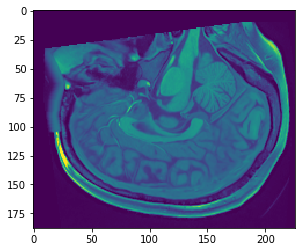

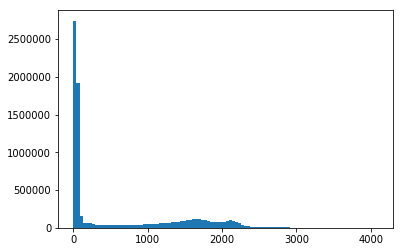

DescribeResult(nobs=8412624, minmax=(0.0, 4096.0), mean=633.50214, variance=673853.06, skewness=0.938593327999115, kurtosis=-0.5049997880329515)


In [5]:
im = sub.get_t1_image()
show_slice(im)
hist(im)

size: (198, 226, 188)
(188, 226, 198)


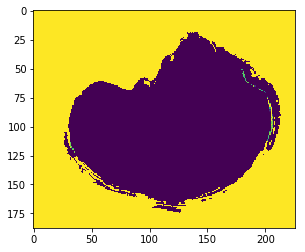

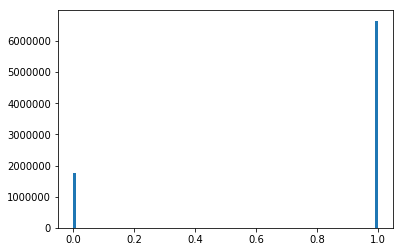

DescribeResult(nobs=8412624, minmax=(0.0, 1.0000001), mean=0.7906571, variance=0.16547015, skewness=-1.4290286302566528, kurtosis=0.04241636452739739)


In [6]:
bg = sub.get_bg_prob_mask()
show_slice(bg)
hist(bg)

size: (198, 226, 188)
(188, 226, 198)


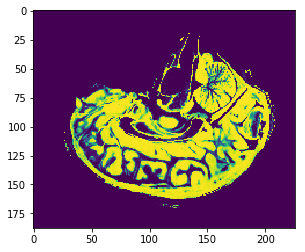

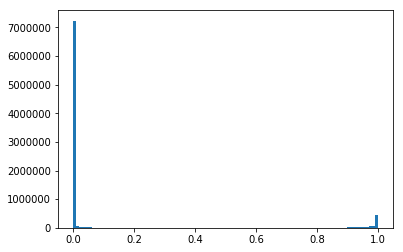

DescribeResult(nobs=8412624, minmax=(0.0, 1.0000001), mean=0.10191857, variance=0.08313768, skewness=2.6051042079925537, kurtosis=4.942247426105035)


In [7]:
gm = sub.get_gm_prob_mask()
show_slice(gm)
hist(gm)

size: (198, 226, 188)
(188, 226, 198)


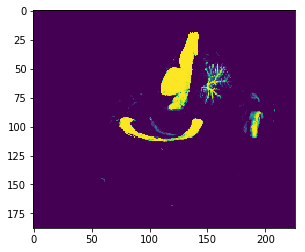

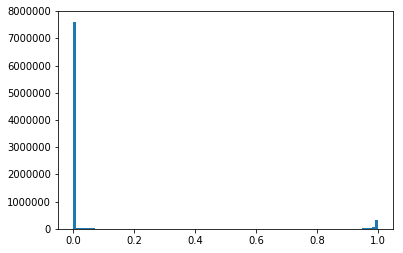

DescribeResult(nobs=8412624, minmax=(0.0, 1.0), mean=0.06683503, variance=0.056763995, skewness=3.4648799896240234, kurtosis=10.242806470195438)


In [8]:
wm = sub.get_wm_prob_mask()
show_slice(wm)
hist(wm)

size: (198, 226, 188)
(188, 226, 198)


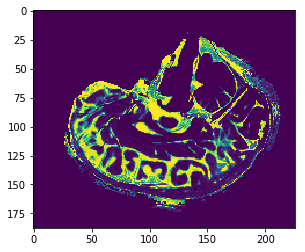

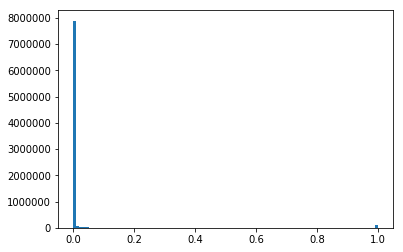

DescribeResult(nobs=8412624, minmax=(0.0, 1.0), mean=0.033119123, variance=0.02626756, skewness=5.148833274841309, kurtosis=25.570143187899955)


In [9]:
csf = sub.get_csf_prob_mask()
show_slice(csf)
hist(csf)

total gm
size: (198, 226, 188)
(188, 226, 198)


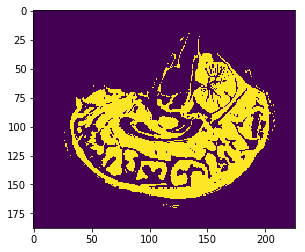

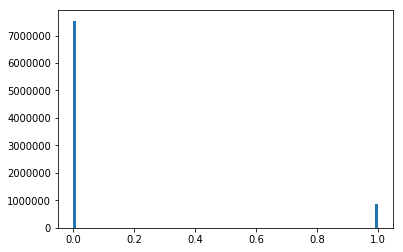

DescribeResult(nobs=8412624, minmax=(0, 1), mean=0.10391145497528476, variance=0.0931138755685548, skewness=2.5960622532877995, kurtosis=4.739539222945768)
total wm
size: (198, 226, 188)
(188, 226, 198)


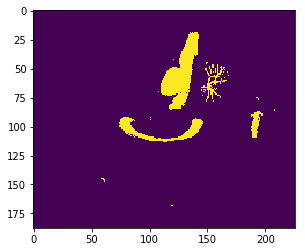

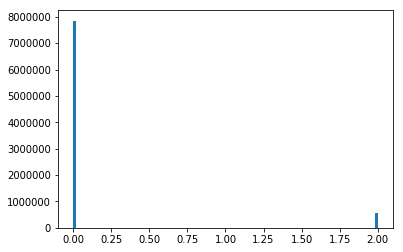

DescribeResult(nobs=8412624, minmax=(0, 2), mean=0.13361063088044825, variance=0.2493694907189206, skewness=3.469936098656612, kurtosis=10.040456528760268)
total csf
size: (198, 226, 188)
(188, 226, 198)


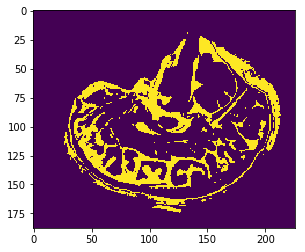

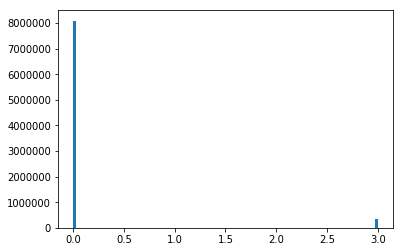

DescribeResult(nobs=8412624, minmax=(0, 3), mean=0.11564833992342936, variance=0.33357052089442957, skewness=4.793829854687228, kurtosis=20.980804675690145)
total label map
size: (198, 226, 188)
(188, 226, 198)


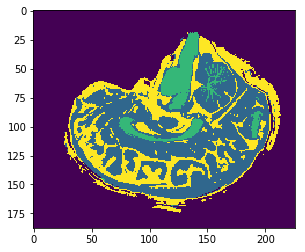

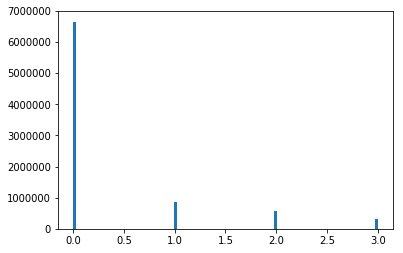

DescribeResult(nobs=8412624, minmax=(0, 3), mean=0.35317042577916236, variance=0.5933484573921537, skewness=2.2021154021104143, kurtosis=3.856348937193597)


In [10]:
BG_THRESH = 0.0000000001
gm = sitk.GetArrayFromImage(gm)
wm = sitk.GetArrayFromImage(wm)
csf = sitk.GetArrayFromImage(csf)
bg = sitk.GetArrayFromImage(bg)
test_gm = sitk.GetImageFromArray(((gm > csf) & (gm > wm) & (bg < BG_THRESH)) * 1)  # 1
print("total gm")
show_slice(test_gm)
hist(test_gm)

test_wm = sitk.GetImageFromArray(((wm > csf) & (wm > gm) & (bg < BG_THRESH)) * 2)  # 2
print("total wm")
show_slice(test_wm)
hist(test_wm)

test_csf = sitk.GetImageFromArray(((csf > gm) & (csf > wm) & (bg < BG_THRESH)) * 3)  # 3
print("total csf")
show_slice(test_csf)
hist(test_csf)

test_csf.CopyInformation(im)
test_gm.CopyInformation(im)
test_wm.CopyInformation(im)


test = test_csf + test_gm + test_wm
print("total label map")
show_slice(test)
hist(test)

In [11]:
test.CopyInformation(im)
sitk.WriteImage(sitk.Cast(test, sitk.sitkUInt8), "/tmp/test.seg.nii.gz")
sitk.WriteImage(sitk.Cast(im, sitk.sitkFloat32), "/tmp/test.nii.gz")

In [12]:
lbl = itk.imread("/tmp/test.seg.nii.gz")

In [13]:
image = itk.imread("/tmp/test.nii.gz")

In [14]:
view(lbl)

Viewer(gradient_opacity=0.22, rendered_image=<itkImagePython.itkImageUC3; proxy of <Swig Object of type 'itkIm…